<a href="https://colab.research.google.com/github/vineelnoel/autoregressive_model/blob/main/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1

In [3]:
len(series)

200

In [4]:
type(series)

numpy.ndarray

In [5]:
import matplotlib.pyplot as plt

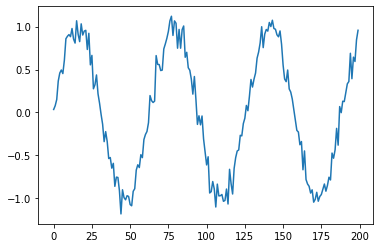

In [6]:
plt.plot(series)
plt.show()

In [7]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t : t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

In [8]:
print(N)

190


In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [11]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

In [12]:
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
3/3 [==============================] - 1s 232ms/step - loss: 0.4035 - val_loss: 0.3072
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.2725 - val_loss: 0.0669
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1128 - val_loss: 0.0906
Epoch 4/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0847 - val_loss: 0.0504
Epoch 5/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0693 - val_loss: 0.0623
Epoch 6/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0608 - val_loss: 0.0446
Epoch 7/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0596 - val_loss: 0.0469
Epoch 8/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0457 - val_loss: 0.0319
Epoch 9/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0434 - val_loss: 0.0260
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0313 - val_loss: 0.0264
Epoch 11/80
3/3 [===========

In [13]:
validation_target = Y[-N//2:]
validation_preditions = []

last_x = X[-N//2]

while len(validation_preditions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  validation_preditions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [14]:
import matplotlib.pyplot as plt

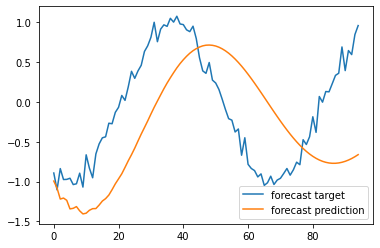

In [15]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_preditions, label='forecast prediction')
plt.legend()
plt.show()